<a href="https://colab.research.google.com/github/Chzacher/ENSYS5800-AI-Energy-zacher.c/blob/main/ENSY5800_Spr21_Hwk2_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENSYS 5800: Applications of Artificial Intelligence in Energy Systems

## Homework 2: Data Analytics

Instructions
1. Use only Jupyter Notebook (with Google Colab) to answer these questions
2. Some questions are short answer and some require you to write some basic code to solve
3. You must show your work for the coding problems (ex. make comments in the code)
4. Your score (i.e. total points) from these question will be converted to the points for this assignment in Canvas (ex. 20 out of 20 converts to 3 points in canvas)

In [3]:
#####===> DO NOT CHANGE THIS CELL <===#####
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
###########################################

### Short answer questions

**1. [1 point] An engineer creates an artificial neural network to predict specific faults in an energy system. Is this an example of weak artificial intelligence, or strong artificial intelligence?**

In [4]:
widgets.RadioButtons(options=['Weak artificial intelligence', 'Strong artificial intelligence'],value=None,description=' ',disabled=False)

RadioButtons(description=' ', options=('Weak artificial intelligence', 'Strong artificial intelligence'), valu…

**2. [1 point] Which of these methods is a technique used to help choose the number of clusters for kmeans clustering?**

In [ ]:
widgets.Select(options=['Elbow Method', 'Educated Guess', 'Delphi technique'],value=None,description='Method:',disabled=False)

Select(description='Method:', options=('Elbow Method', 'Educated Guess', 'Delphi technique'), value=None)

In [ ]:
widgets.RadioButtons(options=['True', 'False'],value=None,description=' ',disabled=False)

Ignored per canvas message

**3. [1 point] Which of these items is *NOT* considered an enabler of the current increase in using Artificial Intelligence? [Select the single best answer]**

In [ ]:
widgets.Select(options=['Big Data', 'Global Warming', 'Moores Law','IoT'],value=None,description='Method:',disabled=False)

Select(description='Method:', options=('Big Data', 'Global Warming', 'Moores Law', 'IoT'), value=None)

### Data Analytics

In [5]:
#####===> DO NOT CHANGE THIS CELL <===#####
import pandas as pd                             # Import the pandas library as the object named 'pd'
import matplotlib.pyplot as plt                 # Import the matplotlib plotting package

url="https://storage.googleapis.com/doe-iac/IAC_Database_20210127.csv"    # Assign the data source URL as a variable called 'url'
data=pd.read_csv(url, sep=',', header=None, error_bad_lines=False)        # Create pandas dataframe, pd, by reading the url data as a csv formatted data file

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Perform data analytics on the DOE IAC Building Energy Data set, focusing on these two columns: *PLANT_AREA* and *EC_plant_usage*

**4. [1 point] Prepare the data set by setting the Column names to the names in the first row, and setting the Index to the ID column.**
>Hint: Use the same approach as last week's example.

In [6]:
##### YOUR CODE HERE #######                                     # Code sourced from: 02a. Fundamentals - Descriptive Analytics - Building Energy Data (Example 2.2).ipynb
headers = data.iloc[0]                                           # Create a temporary variable which is the first row (which has the column names)
data  = pd.DataFrame(data.values[1:], columns=headers)           # Recreate the dataframe and assign the headers variable as the column names (drop the first row)
data = data.set_index(['ID'])                                    # Set the 'ID' column as the index (i.e. key) in the pandas dataframe. (Note that each ID is unique)
data
############################

,CENTER,FY,SIC,NAICS,STATE,SALES,EMPLOYEES,PLANT_AREA,PRODUCTS,PRODUNITS,PRODLEVEL,PRODHOURS,NUMARS,EC_plant_cost,EC_plant_usage,ED_plant_cost,ED_plant_usage,EF_plant_cost,E2_plant_cost,E2_plant_usage,E3_plant_cost,E3_plant_usage,E4_plant_cost,E4_plant_usage,E5_plant_cost,E5_plant_usage,E6_plant_cost,E6_plant_usage,E7_plant_cost,E7_plant_usage,E8_plant_cost,E8_plant_usage,E9_plant_cost,E9_plant_usage,E10_plant_cost,E10_plant_usage,E11_plant_cost,E11_plant_usage,E12_plant_cost,E12_plant_usage,W0_plant_cost,W0_plant_usage,W1_plant_cost,W1_plant_usage,W2_plant_cost,W2_plant_usage,W3_plant_cost,W3_plant_usage,W4_plant_cost,W4_plant_usage,W5_plant_cost,W5_plant_usage,W6_plant_cost,W6_plant_usage
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AM0001,AM,1987,3671,NaN,TX,33900000,206,NaN,MICRO & MINI COMPUTERS,1,310,2250,7,184985,2560082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AM0002,AM,1987,2761,NaN,TX,25000000,156,NaN,BUSINESS FORMS,NaN,NaN,2250,9,267702,4867233,NaN,NaN,NaN,70657,19338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AM0003,AM,1987,3494,NaN,TX,15000000,200,NaN,SAFETY JOINTS & VALVES,NaN,NaN,2250,8,129334,1723036,NaN,NaN,NaN,10146,2074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AM0004,AM,1987,3713,NaN,TX,4200000,75,NaN,TRUCKS BEDS & TRAILERS,1,1000,2340,11,53511,483880,NaN,NaN,NaN,15475,3865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AM0005,AM,1987,2024,NaN,TX,12000000,39,NaN,ICE CREAM,5,2000,2080,7,174617,2868113,NaN,NaN,NaN,10448,2903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WV0599,WV,2020,2812,325180,WV,9.12e+07,232,865000,Chlorinated Dry Bleach,2,5.17e+07,8400,14,1.28201e+06,3.8688e+07,940893,62717,114518,611704,206312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.31439e+06,194544,181045,194544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WV0600,WV,2020,4581,488119,WV,2.9e+06,11,64121,Domestic Airport,NaN,5000,8760,6,34170,747835,30090,1788,1560,34489,4818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WV0601,WV,2020,2085,312140,WV,1e+07,28,6766,Distilled Spirits,5,159,8400,10,29162,746827,36410,2107,2014,71556,10194,1330,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91800,540000,NaN,NaN,24550,54000,NaN,NaN,15085,2.01135e+06


**5. [1 point] Create a new table with just the following columns: SIC, FY, STATE, PLANT_AREA, EC_plant_usage, and PRODUCTS.**

In [7]:
##### YOUR CODE HERE #######                                                               # Code sourced from: https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
data = data[["SIC", "FY", "STATE", "PLANT_AREA", "EC_plant_usage", "PRODUCTS"]]            # Create new filtered data for desired columns
data                                                                                       # Print filtered data to verify code working as intended
############################

,SIC,FY,STATE,PLANT_AREA,EC_plant_usage,PRODUCTS
ID,,,,,,
AM0001,3671,1987,TX,NaN,2560082,MICRO & MINI COMPUTERS
AM0002,2761,1987,TX,NaN,4867233,BUSINESS FORMS
AM0003,3494,1987,TX,NaN,1723036,SAFETY JOINTS & VALVES
AM0004,3713,1987,TX,NaN,483880,TRUCKS BEDS & TRAILERS
AM0005,2024,1987,TX,NaN,2868113,ICE CREAM
...,...,...,...,...,...,...
WV0599,2812,2020,WV,865000,3.8688e+07,Chlorinated Dry Bleach
WV0600,4581,2020,WV,64121,747835,Domestic Airport
WV0601,2085,2020,WV,6766,746827,Distilled Spirits


**6. [1 point] Remove the records that have a missing value in any column, and report the number of records remaining (i.e. the number of rows without missing values in any column).**
>Hint: Use *data.dropna()*

In [8]:
##### YOUR CODE HERE #######                               # Code sourced from: https://www.kite.com/python/answers/how-to-count-the-number-of-rows-in-a-pandas-dataframe-in-python
data = data.dropna()                                       # Define new data set after after dropping data missing any value in any column. This is the default function of data.dropna()
print("Number of Records Remaining:", len(data))           # Print the number of records remaining
data                                                       # Display data  
############################

Number of Records Remaining: 15250


,SIC,FY,STATE,PLANT_AREA,EC_plant_usage,PRODUCTS
ID,,,,,,
AM0159,3412,1992,TX,242000,4800703,STEEL SHIPPING CONTAINERS
AM0162,3731,1992,TX,5900,1145369,ship repair
AM0165,2677,1992,TX,125000,5907093,envelopes
AM0166,3221,1993,TX,409000,39709555,glass containers
AM0167,2869,1993,TX,1742400,29940211,fuel additives & lubricants
...,...,...,...,...,...,...
WV0599,2812,2020,WV,865000,3.8688e+07,Chlorinated Dry Bleach
WV0600,4581,2020,WV,64121,747835,Domestic Airport
WV0601,2085,2020,WV,6766,746827,Distilled Spirits


In [ ]:
widgets.Text(
    value='',
    placeholder='Type something',
    description='Answer:',
    disabled=False
)

Text(value='', description='Answer:', placeholder='Type something')

**7. [1 point] Convert the following columns to floating point (float) for PLANT_AREA and EC_plant_usage, convert the FY (Fiscal Year) column to integer (int), and convert the following columns to string (str), SIC, STATE, PRODUCTS.**
>Hint: Use the *data.astype* command.

In [12]:
##### YOUR CODE HERE #######
data = data.astype({'PLANT_AREA':float, 'EC_plant_usage':float, 'FY': int, 'SIC':str, 'STATE':str, 'PRODUCTS':str})
data
############################

,SIC,FY,STATE,PLANT_AREA,EC_plant_usage,PRODUCTS
ID,,,,,,
AM0159,3412,1992,TX,242000.0,4800703.0,STEEL SHIPPING CONTAINERS
AM0162,3731,1992,TX,5900.0,1145369.0,ship repair
AM0165,2677,1992,TX,125000.0,5907093.0,envelopes
AM0166,3221,1993,TX,409000.0,39709555.0,glass containers
AM0167,2869,1993,TX,1742400.0,29940211.0,fuel additives & lubricants
...,...,...,...,...,...,...
WV0599,2812,2020,WV,865000.0,38688000.0,Chlorinated Dry Bleach
WV0600,4581,2020,WV,64121.0,747835.0,Domestic Airport
WV0601,2085,2020,WV,6766.0,746827.0,Distilled Spirits


In [13]:
print (data.dtypes)                    #printing data type for verification purposes

0
SIC                object
FY                  int64
STATE              object
PLANT_AREA        float64
EC_plant_usage    float64
PRODUCTS           object
dtype: object


**8. [1 point] What is the data type provided in each column? [Choose from the data types covered from lecture 2a]**

In [10]:
tab_contents = ['FY', 'SIC', 'STATE', 'PLANT_AREA', 'PRODUCTS', 'EC_plant_usage']
children = [widgets.Text(description="Data Type:") for name in tab_contents]
tab = widgets.Tab()
tab.children = children
for i in range(len(children)):
    tab.set_title(i, str(tab_contents[i]))
tab

**9. [2 points] The data set has too many building types. Select only records for sites that have a Standard Industrial Classification as "Electronic & Other Electric Equipment" (SIC starts with 36). (*Hint: Using something like this...   data[' '].str[:2] == " "]*  )**

In [14]:
##### YOUR CODE HERE #######
data = data[data['SIC'].str.startswith('36')]                                    #identify and isolate rows in df that have "36" as the starting sybmols in the string stored int he SIC column
data                                                                             #print data to verify its working
############################

,SIC,FY,STATE,PLANT_AREA,EC_plant_usage,PRODUCTS
ID,,,,,,
AM0271,3648,1996,TX,250000.0,1879836.0,Commercial & Industrial Indoor and outdoor lig...
AM0284,3694,1996,TX,142000.0,3123388.0,Automotive parts
AM0316,3646,1998,TX,100700.0,1413247.0,Industrial and marine lighting fixtures
AM0342,3678,1999,TX,24000.0,1143025.0,Assembly of electronic connectors
AM0343,3612,1999,TX,50000.0,1221278.0,"Transformers, switchgear"
...,...,...,...,...,...,...
WV0476,3678,2013,OH,126000.0,1098885.0,electronic connectors and cables
WV0497,3694,2015,WV,302665.0,10529750.0,Spark Plugs and O2 Sensors
WV0514,3621,2015,OH,46500.0,2008800.0,Motors and Plastics


**10. [1 point] Create a scatterplot of PLANT_AREA versus EC_plant_usage**
>Hint: Use *data.plot.scatter*

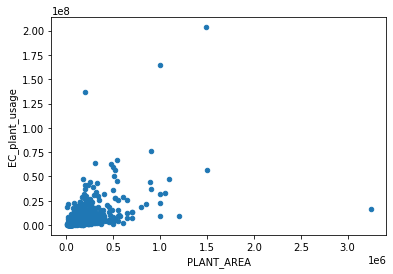

In [15]:
##### YOUR CODE HERE #######
data.plot.scatter(x='PLANT_AREA',y='EC_plant_usage')                  #create scatter plot of requested values

############################

**11. [3 points] Identify and remove outliers, in the 'PLANT_AREA' and 'EC_plant_usage' columns, using the the sklearn Elliptic Envelope Covariance Subroutine (default settings). Create a scatterplot to view the new data.**
> HINTS:
>* [sklearn outlier detection chapter](https://scikit-learn.org/stable/modules/outlier_detection.html)
>* [sklearn outlier detection with covariance elliptic envelope](https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html)
>* Use the outlier detection routine to assign 1 (inlier) or -1 (outlier) as a new column. Create a scatter plot to visualize the inliers & outliers as groups.
>>1. Use a subset of the data which is just the two columns. Then, fit the ellipticenvelope to the data.
>>2. Make a prediction using the same data and the ellipticenvelope fit (the default output is either 1 for an inlier or -1 for an outlier)
>>3. Select just the inliers as your new data table

In [16]:
##### YOUR CODE HERE #######
from sklearn.covariance import EllipticEnvelope                   #import covariance subroutine
data_subset = data[["EC_plant_usage","PLANT_AREA"]]               #create a data subset to run the covariance subroutine on 
cov = EllipticEnvelope(random_state=0).fit_predict(data_subset)   #run the subroutine and store inlier/outlier data into new variable
data['cov'] = cov                                                 #add covariance data to df
data = data[cov == 1]                                             #remove oultiers from the dataset
data                                                              #print data to verify its working
############################

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,SIC,FY,STATE,PLANT_AREA,EC_plant_usage,PRODUCTS,cov
ID,,,,,,,
AM0271,3648,1996,TX,250000.0,1879836.0,Commercial & Industrial Indoor and outdoor lig...,1
AM0284,3694,1996,TX,142000.0,3123388.0,Automotive parts,1
AM0316,3646,1998,TX,100700.0,1413247.0,Industrial and marine lighting fixtures,1
AM0342,3678,1999,TX,24000.0,1143025.0,Assembly of electronic connectors,1
AM0343,3612,1999,TX,50000.0,1221278.0,"Transformers, switchgear",1
...,...,...,...,...,...,...,...
WV0474,3694,2013,WV,110000.0,11082950.0,automotive ignition coils,1
WV0476,3678,2013,OH,126000.0,1098885.0,electronic connectors and cables,1
WV0497,3694,2015,WV,302665.0,10529750.0,Spark Plugs and O2 Sensors,1


**12. [2 points] Calculate the Energy Usage Index for this data, as EUI = EC_plant_usage/PLANT_AREA. Create a histogram of EUI and report the mean EUI for this data.**
> HINT: Use last week's example for a reference

In [22]:
EUI = data['EC_plant_usage'].divide(data['PLANT_AREA'])   #calculate EUI and create new variable to hold data
data['EUI'] = EUI                                          #add EUI to df
data                                                      #print data to verify steps worked

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SIC,FY,STATE,PLANT_AREA,EC_plant_usage,PRODUCTS,cov,EUI
ID,,,,,,,,
AM0271,3648,1996,TX,250000.0,1879836.0,Commercial & Industrial Indoor and outdoor lig...,1,7.519344
AM0284,3694,1996,TX,142000.0,3123388.0,Automotive parts,1,21.995690
AM0316,3646,1998,TX,100700.0,1413247.0,Industrial and marine lighting fixtures,1,14.034230
AM0342,3678,1999,TX,24000.0,1143025.0,Assembly of electronic connectors,1,47.626042
AM0343,3612,1999,TX,50000.0,1221278.0,"Transformers, switchgear",1,24.425560
...,...,...,...,...,...,...,...,...
WV0474,3694,2013,WV,110000.0,11082950.0,automotive ignition coils,1,100.754091
WV0476,3678,2013,OH,126000.0,1098885.0,electronic connectors and cables,1,8.721310
WV0497,3694,2015,WV,302665.0,10529750.0,Spark Plugs and O2 Sensors,1,34.790114


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77feadf510>]],
      dtype=object)

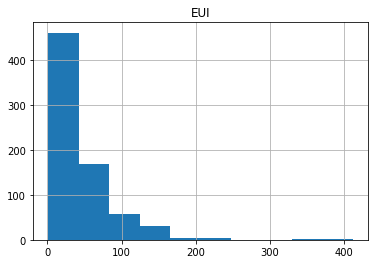

In [23]:
##### YOUR CODE HERE #######

data.hist(column='EUI')       #make histogram of EUI data

############################

In [21]:
eui_mean = data['EUI'].mean()   #calculate the mean of EUI and set a new variable to hold value
eui_mean                        #print value

44.65403169688285

In [9]:
widgets.Text(
    value='',
    placeholder='Type something',
    description='Answer:',
    disabled=False
)

Text(value='', description='Answer:', placeholder='Type something')

**13. [3 points] REFLECTION: Write a short paragraph on what you learned, answering the following questions**
>* What is your overall assessment of the quality of the raw data? Are there likely to be outliers?
>* How confident are you that the outliers identified by the covariance method (EllipticEnvelope), can be removed?
>* What future work do you recommend to understand the data better, prior to implementing A.I. techniques?

In [10]:
widgets.Text(
    value='',
    placeholder='Type something',
    description='Answer:',
    disabled=False
)

Text(value='', description='Answer:', placeholder='Type something')

*   My assessment of the raw data is that it was poor for what we were looking to investigate. The original data set was ~1900 points. By the time we removed all points that were missing data and focused on the building time we cared about we were left with only ~800 points. While the outlier number we identified in this reduced data set was only ~10% of the set I would not be surprised to see more outliers with a larger data set. I would anticipate finding outlier in set of test data as well.

*   My confidence on the abilitiy to remove the outliers using this method is low. While visualizig the data set it is easy to spot outliers in the magnitude of 1-2% of the reduced data set. However, I would need a better visualization of the data to feel confident that the outlier group identified by the subroutine was not too broad.

*   I would start by going back to the orginal data set and removing any of the building types we didn't want at that stage. I would then remove anything that was missing data in the two specific sections we have in question "EC_plant_usage" and "Plant_area". With this new data set I compare a simillar analysis to see the outcome.

    It may also be valuable to run an additional type of outlier subroutine on the orginal and targeted data sets. Perhaps growing or restricting the definition of outlier.



